In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

Did you notice the slow speeds of the previous parts where lines and circles are detected using Hough Transform.

You can calculate run time of the previous codes using time() function in time module.

List atleast three reasons for the algorithm taking so much time.

In [ ]:
reasons = """
1. There is a lack of vectorization (extensive use of for loops) in both circles and lines. This becomes increasingly problematic as the size of the image increases.
2. Hough Transformation for lines computes all possible lines that pass a point for each edge point in image.
3. Hough Transformation for circles is very expensive as we don't know the radius and we have to check for several possible radii.
"""   #Replace ... by your reasons
print(reasons)


1. There is a lack of vectorization (extensive use of for loops) in both circles and lines. This becomes increasingly problematic as the size of the image increases.
2. Hough Transformation for lines computes all possible lines that pass a point for each edge point in image.
3. Hough Transformation for circles is very expensive as we don't know the radius and we have to check for several possible radii.




Suggest atleast two methods to speed up the algorithm.

In [ ]:
methods = """
1. We can resolve Problem mentioned in pt. 1 by using vectorisation and replacing the nested for loops. Functions in numpy are optimised for such operations.
2. Problem mentioned in pt. 2 and 3 can be solved by using gradient information to reduce the number of probable candidates. For lines, we only consider the lines which are in the same direction with the gradient orientation at edge point. For circles, gradient orientation provides with the probable theta.
"""   #Replace ... by your methods
print(methods)


1. We can resolve Problem mentioned in pt. 1 by using vectorisation and replacing the nested for loops. Functions in numpy are optimised for such operations.
2. Problem mentioned in pt. 2 and 3 can be solved by using gradient information to reduce the number of probable candidates. For lines, we only consider the lines which are in the same direction with the gradient orientation at edge point. For circles, gradient orientation provides with the probable theta.




Implement any one of the above methods on either line or circle detection code (your own code) and calculate the time taken by your method.

In [ ]:
# Here, I have addressed Problem pt. 2 by using the gradient information for Hough Transformation of lines.

import numpy as np
import imageio
import math
import matplotlib.pyplot as plt
import cv2

img = imageio.imread('pic1.png') 

def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    accumulator = np.zeros((2*diag_len, num_thetas), dtype=np.uint8)
    y_idxs_, x_idxs_ = np.where(img == 255 * lines_are_white)
    x_idxs = []
    y_idxs = []
    for idxs in zip(x_idxs_, y_idxs_):
      xidx, yidx = idxs
      try:
        if lines_are_white:
          if img[xidx-1, yidx-1] < value_threshold or img[xidx, yidx-1] < value_threshold or img[xidx+1, yidx-1] < value_threshold or img[xidx+1, yidx] < value_threshold or img[xidx+1, yidx+1] < value_threshold or img[xidx, yidx+1] < value_threshold or img[xidx-1, yidx+1] < value_threshold or img[xidx-1, yidx] < value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
        else:
           if img[xidx-1, yidx-1] > value_threshold or img[xidx, yidx-1] > value_threshold or img[xidx+1, yidx-1] > value_threshold or img[xidx+1, yidx] > value_threshold or img[xidx+1, yidx+1] > value_threshold or img[xidx, yidx+1] > value_threshold or img[xidx-1, yidx+1] > value_threshold or img[xidx-1, yidx] > value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
      except IndexError as e:
        pass
    for idxs in zip(x_idxs, y_idxs):
      for i in range(num_thetas):
        xidx, yidx = idxs
        rho = diag_len + int(round(xidx * cos_t[i] + yidx * sin_t[i]))
        accumulator[rho, (num_thetas-1) - i] += 1
    return accumulator, thetas, rhos

def line_detect_hough_mod(img, angle_step=1, lines_are_white=True, value_threshold=5):
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    accumulator = np.zeros((2*diag_len, num_thetas), dtype=np.uint8)
    y_idxs_, x_idxs_ = np.where(img == 255 * lines_are_white)
    x_idxs = []
    y_idxs = []
    for idxs in zip(x_idxs_, y_idxs_):
      xidx, yidx = idxs
      try:
        if lines_are_white:
          if img[xidx-1, yidx-1] < value_threshold or img[xidx, yidx-1] < value_threshold or img[xidx+1, yidx-1] < value_threshold or img[xidx+1, yidx] < value_threshold or img[xidx+1, yidx+1] < value_threshold or img[xidx, yidx+1] < value_threshold or img[xidx-1, yidx+1] < value_threshold or img[xidx-1, yidx] < value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
        else:
           if img[xidx-1, yidx-1] > value_threshold or img[xidx, yidx-1] > value_threshold or img[xidx+1, yidx-1] > value_threshold or img[xidx+1, yidx] > value_threshold or img[xidx+1, yidx+1] > value_threshold or img[xidx, yidx+1] > value_threshold or img[xidx-1, yidx+1] > value_threshold or img[xidx-1, yidx] > value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
      except IndexError as e:
        pass
    
    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    img2 = cv2.GaussianBlur(img, (5,5), 1.4)
    Mx = cv2.filter2D(src= img2, ddepth= -1, kernel= Kx)
    My = cv2.filter2D(src= img2, ddepth= -1, kernel= Ky)
    theta = np.arctan2(My, Mx)  # rad

    for idxs in zip(x_idxs, y_idxs):
      xidx, yidx = idxs
      if Mx[yidx, xidx] == 0 or My[yidx, xidx] == 0:
        continue
      rho = diag_len + int(round(xidx * np.cos(theta[yidx, xidx]) + yidx * np.sin(theta[yidx, xidx])))
      accumulator[rho, 89 - int(round(theta[yidx, xidx]*180/np.pi))] += 1
    return accumulator, thetas, rhos

Global Maxima encounterd at: Rho = 142, Theta = 42.0 degrees with value = 108
Time Taken by Original Code: 7.465742349624634 seconds.
Global Maxima encounterd at: Rho = 146, Theta = 45.0 degrees with value = 31
Time Taken by Modified Code: 0.0892648696899414 seconds.


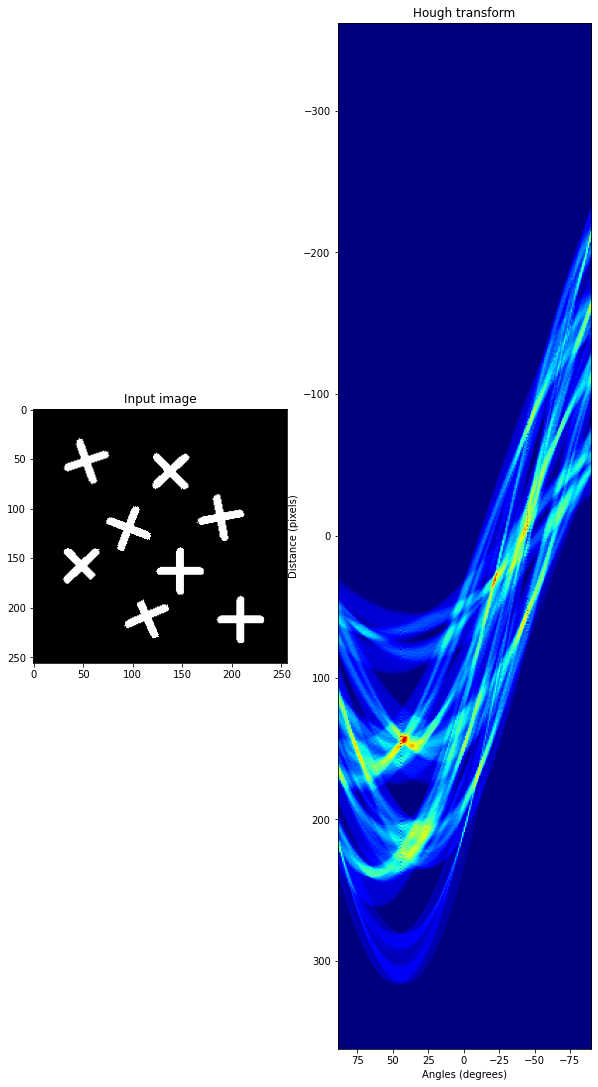

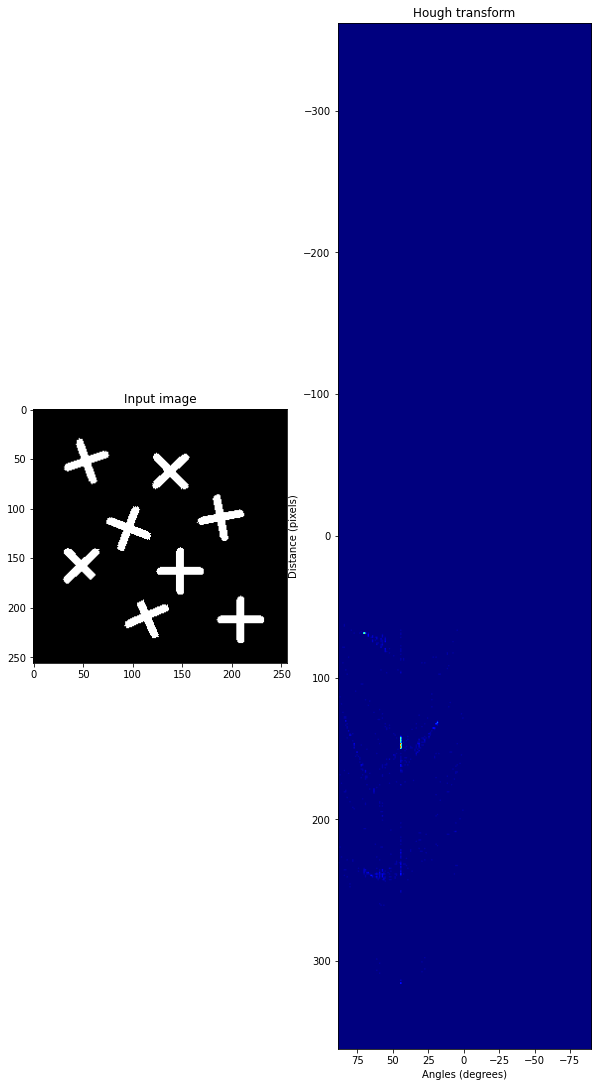

In [ ]:
## Do not change anything in this block ##

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

import time
diag_len = int(round(math.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2)))

tm1 = time.time()
accumulator, thetas, rhos = line_detect_hough(img)
display_hough(img, accumulator, thetas, rhos)
rho_max, theta_max = np.unravel_index(np.argmax(accumulator), accumulator.shape)
rho_max -= diag_len
theta_max = np.round(thetas[(len(thetas)-1) - theta_max]*180/np.pi, 2)
print("Global Maxima encounterd at: Rho = "+str(rho_max)+", Theta = "+str(theta_max)+" degrees with value = "+str(np.max(accumulator)))
print("Time Taken by Original Code: "+str(time.time()-tm1)+" seconds.")

tm1 = time.time()
accumulator, thetas, rhos = line_detect_hough_mod(img)
display_hough(img, accumulator, thetas, rhos)
rho_max, theta_max = np.unravel_index(np.argmax(accumulator), accumulator.shape)
rho_max -= diag_len
theta_max = np.round(thetas[(len(thetas)-1) - theta_max]*180/np.pi, 2)
print("Global Maxima encounterd at: Rho = "+str(rho_max)+", Theta = "+str(theta_max)+" degrees with value = "+str(np.max(accumulator)))
print("Time Taken by Modified Code: "+str(time.time()-tm1)+" seconds.")